<a href="https://colab.research.google.com/github/JoaoCalheiros/data_analysis_case_study_2/blob/main/case_study_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study: How Can Bellabeat, A Wellness Technology Company Play It Smart?**

# **Introduction**

This analysis case study is one of the Capstones projects requirements for 
[Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics).
For my analysis I used Fitbit *'dailyActivity_merged.csv'* and *'hourlyCalories_merged.csv'* files. The data is  publicly available [here](https://www.kaggle.com/arashnic/fitbit).

The analysis follows the 6 phases of the Data Analysis process: Ask, Prepare, Process, Analyse, Share and Act.

**Ask**
  * Ask effective questions
  * Define the scope of the analysis
  * Define what success looks like

**Prepare**
  * Verify data’s integrity
  * Check data credibility and reliability
  * Check data types
  * Merge datasets

**Process**
  * Clean, Remove and Transform data
  * Document cleaning processes and results

**Analyse**
  * Identify patterns
  * Draw conclusions
  * Make predictions

**Share**
  * Create effective visuals
  * Create a story for data
  * Share insights to stakeholders

**Act**
  * Give recommendations based on insights
  * Solve problems
  * Create something new

# **1. Ask**


### **Scenario**
The objective of this analysis is to look at the current trends of smart device usage and how these trends can apply to Bellabeat customers. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart
device fitness data could help unlock new growth opportunities for the company.

### **Stakeholders**
  * Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
  * Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team


### **Deliverables**
  * What are some trends in smart device usage?
  * How could these trends apply to Bellabeat customers?
  * How could these trends help influence Bellabeat marketing strategy?
  * When and how often do these users engage in physical activities over the course of a day?


# **2. Prepare**


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [96]:
# Code to read csv file from google drive into Colaboratory:
# Retrieved from the following link
# https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [97]:
# Loading each Dataset into its own DataFrame and making a copy of each one

link = 'https://drive.google.com/file/d/1T0OwKEewKA2GkJnwg62BpryBdv0fv9Q4/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xclara.csv')  
  
daily_activity_df = pd.read_csv('xclara.csv')
daily_activity_df_copy = daily_activity_df.copy()

daily_activity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [98]:
daily_activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [99]:
# Loading each Dataset into its own DataFrame and making a copy of each one

link = 'https://drive.google.com/file/d/1uJHJYiAyLY3zp8QDWa3Qg_5TCUNdvo-N/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xclara.csv')  
  
hourly_cal_df = pd.read_csv('xclara.csv')
hourly_cal_df_copy = hourly_cal_df.copy()

hourly_cal_df.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [100]:
hourly_cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [101]:
# Loading each Dataset into its own DataFrame and making a copy of each one

link = 'https://drive.google.com/file/d/1wufT1q5bf3BiZqJDNKnu5Kt6zLt7uiSo/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xclara.csv')  
  
sleep_day_df = pd.read_csv('xclara.csv')
sleep_dat_df_copy = sleep_day_df.copy()

sleep_day_df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [102]:
sleep_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


# **3. Process**

* Combine all the DataFrames into one DataFrame
* Clean data

## **Hourly Calories DataFrame**

In [103]:
# Check if there are only 30 users
print('Unique Users Count: ',hourly_cal_df['Id'].nunique())
# I get 33 users

# Lets see how many hours each of these 33 users registered during a 744 hours period (24x31)
registers_per_id = hourly_cal_df['Id'].value_counts()
print('Hours registered per user id before change: ', registers_per_id)
print('\n')

# I will drop the user with only 88 hours registered
hourly_cal_df = hourly_cal_df[hourly_cal_df['Id'].isin(registers_per_id[registers_per_id >= 100].index)]

# Lets check if the change was successful
print('Hours registered per user id after change: ',hourly_cal_df['Id'].value_counts())                             

Unique Users Count:  33
Hours registered per user id before change:  4558609924    736
2873212765    736
1624580081    736
2026352035    736
1927972279    736
2022484408    736
2320127002    735
8378563200    735
4388161847    735
8877689391    735
8053475328    735
4445114986    735
7086361926    733
6962181067    732
4020332650    732
4702921684    731
1844505072    731
5553957443    730
4319703577    724
8583815059    718
1503960366    717
5577150313    708
1644430081    708
3977333714    696
8792009665    672
6290855005    665
6117666160    660
6775888955    610
7007744171    601
3372868164    472
8253242879    431
2347167796    414
4057192912     88
Name: Id, dtype: int64


Hours registered per user id after change:  4558609924    736
1624580081    736
2022484408    736
2026352035    736
2873212765    736
1927972279    736
4445114986    735
4388161847    735
8877689391    735
8378563200    735
2320127002    735
8053475328    735
7086361926    733
4020332650    732
6962181067    73

In [104]:
# Convert column 'ActivityDate' to DateTime,
# Create 2 new columns: for Day of the week and Time

hourly_cal_df['ActivityHour'] = pd.to_datetime(hourly_cal_df['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p', dayfirst=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [105]:
# Create 2 new columns to separate Date from Time
hourly_cal_df['Date'] = pd.to_datetime(hourly_cal_df['ActivityHour']).dt.date
hourly_cal_df['Time'] = pd.to_datetime(hourly_cal_df['ActivityHour']).dt.time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
hourly_cal_df.head(10)

,Id,ActivityHour,Calories,Date,Time
0,1503960366,2016-04-12 00:00:00,81,2016-04-12,00:00:00
1,1503960366,2016-04-12 01:00:00,61,2016-04-12,01:00:00
2,1503960366,2016-04-12 02:00:00,59,2016-04-12,02:00:00
3,1503960366,2016-04-12 03:00:00,47,2016-04-12,03:00:00
4,1503960366,2016-04-12 04:00:00,48,2016-04-12,04:00:00
5,1503960366,2016-04-12 05:00:00,48,2016-04-12,05:00:00
6,1503960366,2016-04-12 06:00:00,48,2016-04-12,06:00:00
7,1503960366,2016-04-12 07:00:00,47,2016-04-12,07:00:00
8,1503960366,2016-04-12 08:00:00,68,2016-04-12,08:00:00
9,1503960366,2016-04-12 09:00:00,141,2016-04-12,09:00:00


In [107]:
hourly_cal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22011 entries, 0 to 22098
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            22011 non-null  int64         
 1   ActivityHour  22011 non-null  datetime64[ns]
 2   Calories      22011 non-null  int64         
 3   Date          22011 non-null  object        
 4   Time          22011 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.0+ MB


## **Daily Activity DataFrame**

In [108]:
# Finding null values in the DataFrame
missing_val = daily_activity_df.isnull().sum()
missing_val

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [109]:
daily_activity_df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [110]:
# Check if there are only 30 users
print('Unique Users Count: ',daily_activity_df['Id'].nunique())
# I get 33 users

# Lets see how many days each of these 33 users registered during a 31 days period
registers_per_id = daily_activity_df['Id'].value_counts()
print('Days registered per user id before change: ', registers_per_id)
print('\n')

# I will drop the user with only 4 registers
daily_activity_df = daily_activity_df[daily_activity_df['Id'].isin(registers_per_id[registers_per_id >= 10].index)]

# Lets check if the change was successful
print('Days registered per user id after change: ',daily_activity_df['Id'].value_counts())

Unique Users Count:  33
Days registered per user id before change:  1624580081    31
4319703577    31
2320127002    31
4020332650    31
1503960366    31
4388161847    31
7086361926    31
2026352035    31
1927972279    31
2022484408    31
1844505072    31
4702921684    31
4558609924    31
8053475328    31
8877689391    31
5553957443    31
4445114986    31
6962181067    31
8378563200    31
8583815059    31
2873212765    31
3977333714    30
5577150313    30
1644430081    30
8792009665    29
6290855005    29
6117666160    28
7007744171    26
6775888955    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: Id, dtype: int64


Days registered per user id after change:  1624580081    31
4319703577    31
2320127002    31
4020332650    31
1503960366    31
4388161847    31
7086361926    31
2026352035    31
1927972279    31
2022484408    31
1844505072    31
4702921684    31
4558609924    31
8053475328    31
8877689391    31
2873212765    31
6962181067    31
5553957443    

In [111]:
# Convert column 'ActivityDate' to DateTime,
# Create new columns

daily_activity_df['ActivityDate'] = pd.to_datetime(daily_activity_df['ActivityDate'], format='%m/%d/%Y', dayfirst=True)
print(daily_activity_df.info())

import calendar

daily_activity_df['Day'] = daily_activity_df['ActivityDate'].dt.day_name()
daily_activity_df['ActiveMinutesTotal'] = daily_activity_df['VeryActiveMinutes'] + daily_activity_df['FairlyActiveMinutes'] + daily_activity_df['LightlyActiveMinutes']  
daily_activity_df['ActiveHoursTotal'] = daily_activity_df['ActiveMinutesTotal'] / 60
daily_activity_df['SedentaryHoursTotal'] = daily_activity_df['SedentaryMinutes'] / 60

daily_activity_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        936 non-null    int64         
 1   ActivityDate              936 non-null    datetime64[ns]
 2   TotalSteps                936 non-null    int64         
 3   TotalDistance             936 non-null    float64       
 4   TrackerDistance           936 non-null    float64       
 5   LoggedActivitiesDistance  936 non-null    float64       
 6   VeryActiveDistance        936 non-null    float64       
 7   ModeratelyActiveDistance  936 non-null    float64       
 8   LightActiveDistance       936 non-null    float64       
 9   SedentaryActiveDistance   936 non-null    float64       
 10  VeryActiveMinutes         936 non-null    int64         
 11  FairlyActiveMinutes       936 non-null    int64         
 12  LightlyActiveMinutes  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day,ActiveMinutesTotal,ActiveHoursTotal,SedentaryHoursTotal
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,366,6.100000,12.133333
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,257,4.283333,12.933333
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,222,3.700000,20.300000
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,272,4.533333,12.100000
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,267,4.450000,12.883333


## **Sleep Time DataFrame**

In [112]:
sleep_day_df

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [113]:
# Convert column 'SleepDay' to DateTime,
# Create new column for day of the week

sleep_day_df['SleepDay'] = pd.to_datetime(sleep_day_df['SleepDay'], format='%m/%d/%Y %I:%M:%S %p', dayfirst=True)
sleep_day_df['Day'] = sleep_day_df['SleepDay'].dt.day_name()

In [114]:
sleep_day_df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [115]:
mon_sleep = int(sleep_day_df['TotalMinutesAsleep'].where(sleep_day_df['Day'] == 'Monday').mean() / 60)
tue_sleep = int(sleep_day_df['TotalMinutesAsleep'].where(sleep_day_df['Day'] == 'Tuesday').mean() / 60)
wed_sleep = int(sleep_day_df['TotalMinutesAsleep'].where(sleep_day_df['Day'] == 'Wednesday').mean() / 60)
thu_sleep = int(sleep_day_df['TotalMinutesAsleep'].where(sleep_day_df['Day'] == 'Thursday').mean() / 60)
fri_sleep = int(sleep_day_df['TotalMinutesAsleep'].where(sleep_day_df['Day'] == 'Friday').mean() / 60)
sat_sleep = int(sleep_day_df['TotalMinutesAsleep'].where(sleep_day_df['Day'] == 'Saturday').mean() / 60)
sun_sleep = int(sleep_day_df['TotalMinutesAsleep'].where(sleep_day_df['Day'] == 'Sunday').mean() / 60)

# **4 & 5. Analyse & Share**


## **Visualization**
  * How users utilize smart devices throughout the day

In [116]:
# Lets see how users utilize the smart devices throughout the day
# Must turn 'Time' column to type 'str' in order to '.where()' to work.
hourly_cal_df['Time'] = hourly_cal_df['Time'].astype('str')

time_00 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '00:00:00').dropna().mean())
time_01 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '01:00:00').dropna().mean())
time_02 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '02:00:00').dropna().mean())
time_03 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '03:00:00').dropna().mean())
time_04 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '04:00:00').dropna().mean())
time_05 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '05:00:00').dropna().mean())
time_06 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '06:00:00').dropna().mean())
time_07 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '07:00:00').dropna().mean())
time_08 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '08:00:00').dropna().mean())
time_09 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '09:00:00').dropna().mean())
time_10 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '10:00:00').dropna().mean())
time_11 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '11:00:00').dropna().mean())
time_12 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '12:00:00').dropna().mean()) 
time_13 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '13:00:00').dropna().mean())
time_14 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '14:00:00').dropna().mean())
time_15 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '15:00:00').dropna().mean())
time_16 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '16:00:00').dropna().mean())
time_17 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '17:00:00').dropna().mean())
time_18 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '18:00:00').dropna().mean())
time_19 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '19:00:00').dropna().mean())
time_20 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '20:00:00').dropna().mean())
time_21 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '21:00:00').dropna().mean())
time_22 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '22:00:00').dropna().mean())
time_23 = int(hourly_cal_df['Calories'].where(hourly_cal_df['Time'] == '23:00:00').dropna().mean())

In [117]:
# Create DataFrame for the visualization
col = {'avg_cal': [time_00, time_01, time_02, time_03, time_04, time_05, time_06, time_07, time_08, time_09, time_10, time_11,
                   time_12, time_13, time_14, time_15, time_16, time_17, time_18, time_19, time_20, time_21, time_22, time_23,]}

time_df = pd.DataFrame(data=col, index=['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
                                        '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])
time_df = time_df.reset_index()
time_df.rename(columns={'index': 'hours'}, inplace=True)
time_df

,hours,avg_cal
0,00,71
1,01,70
2,02,69
3,03,67
4,04,68
5,05,81
6,06,87
7,07,94
8,08,103
9,09,106


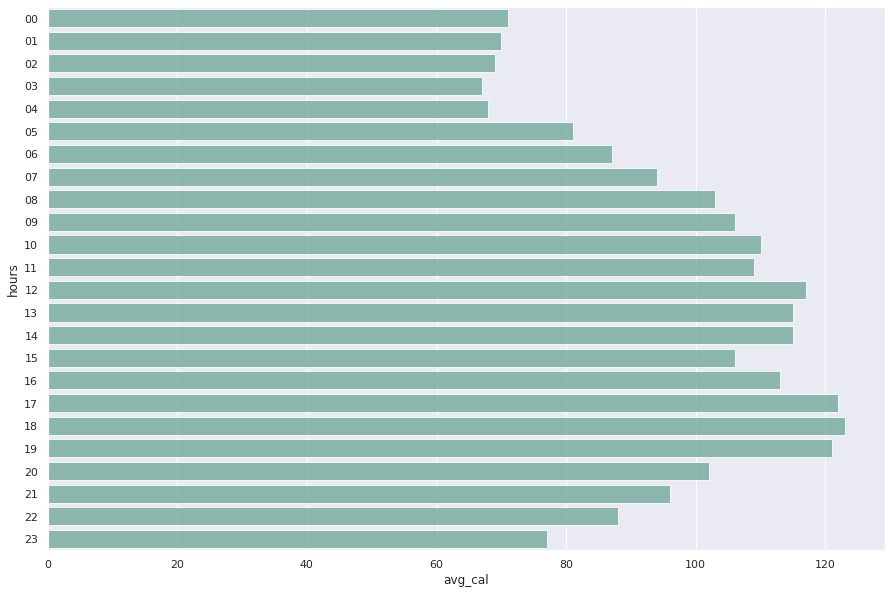

In [118]:
# Visualization 1
plt.figure(figsize=(15,10))

sns.set(style='darkgrid')
sns.barplot(
    x='avg_cal',
    y='hours',
    data=time_df,
    color='#69b3a2',
    alpha=0.8
)

## **Visualization**
  * Users type of physical activity when using the smart devices

In [119]:
# Prepare a DataFrame to create the visualization

subset_0 = daily_activity_df.drop(columns=['TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance',
                                          'LightActiveDistance', 'SedentaryActiveDistance', 'ActivityDate', 'TotalDistance'])
subset_0['VeryActiveHours'] = subset_0['VeryActiveMinutes'] / 60
subset_0['FairlyActiveHours'] = subset_0['FairlyActiveMinutes'] / 60
subset_0['LightlyActiveHours'] = subset_0['LightlyActiveMinutes'] / 60
subset_0 = subset_0[['Id', 'Day', 'VeryActiveMinutes', 'VeryActiveHours', 'FairlyActiveMinutes', 'FairlyActiveHours', 'LightlyActiveMinutes', 'LightlyActiveHours', 'ActiveHoursTotal', 
                     'SedentaryHoursTotal', 'SedentaryMinutes', 'Calories', 'TotalSteps']]
subset_0

,Id,Day,VeryActiveMinutes,VeryActiveHours,FairlyActiveMinutes,FairlyActiveHours,LightlyActiveMinutes,LightlyActiveHours,ActiveHoursTotal,SedentaryHoursTotal,SedentaryMinutes,Calories,TotalSteps
0,1503960366,Tuesday,25,0.416667,13,0.216667,328,5.466667,6.100000,12.133333,728,1985,13162
1,1503960366,Wednesday,21,0.350000,19,0.316667,217,3.616667,4.283333,12.933333,776,1797,10735
2,1503960366,Thursday,30,0.500000,11,0.183333,181,3.016667,3.700000,20.300000,1218,1776,10460
3,1503960366,Friday,29,0.483333,34,0.566667,209,3.483333,4.533333,12.100000,726,1745,9762
4,1503960366,Saturday,36,0.600000,10,0.166667,221,3.683333,4.450000,12.883333,773,1863,12669
...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,Sunday,17,0.283333,4,0.066667,245,4.083333,4.433333,19.566667,1174,2847,10686
936,8877689391,Monday,73,1.216667,19,0.316667,217,3.616667,5.150000,18.850000,1131,3710,20226
937,8877689391,Tuesday,18,0.300000,11,0.183333,224,3.733333,4.216667,19.783333,1187,2832,10733
938,8877689391,Wednesday,88,1.466667,12,0.200000,213,3.550000,5.216667,18.783333,1127,3832,21420


In [135]:
very_act_h = int(subset_0['VeryActiveHours'].sum())
fairly_act_h = int(subset_0['FairlyActiveHours'].sum())
light_act_h = int(subset_0['LightlyActiveHours'].sum())
act_h_tot = int(subset_0['ActiveHoursTotal'].sum())
sed_h_tot = int(subset_0['SedentaryHoursTotal'].sum())

# Print some percentages
very_active_perc = "{:.2f}".format((very_act_h * 100) / act_h_tot)
fairly_active_perc = "{:.2f}".format((fairly_act_h * 100) / act_h_tot)
light_active_perc = "{:.2f}".format((light_act_h * 100) / act_h_tot)
active_hours_perc = "{:.2f}".format((act_h_tot * 100) / (act_h_tot + sed_h_tot))
sedentary_hours_perc = "{:.2f}".format((sed_h_tot * 100) / (act_h_tot + sed_h_tot))

print('Total Active Hours: ', active_hours_perc, '%', '\n',
      '\tVery Active Hours: ', very_active_perc, '%', '\n',
      '\tFairly Active Hours: ', fairly_active_perc, '%', '\n',
      '\tLight Active Hours: ', light_active_perc, '%', '\n',
      'Total Sedentary Hours: ', sedentary_hours_perc, '%', '\n')

Total Active Hours:  18.72 % 
 	Very Active Hours:  9.31 % 
 	Fairly Active Hours:  5.96 % 
 	Light Active Hours:  84.71 % 
 Total Sedentary Hours:  81.28 % 



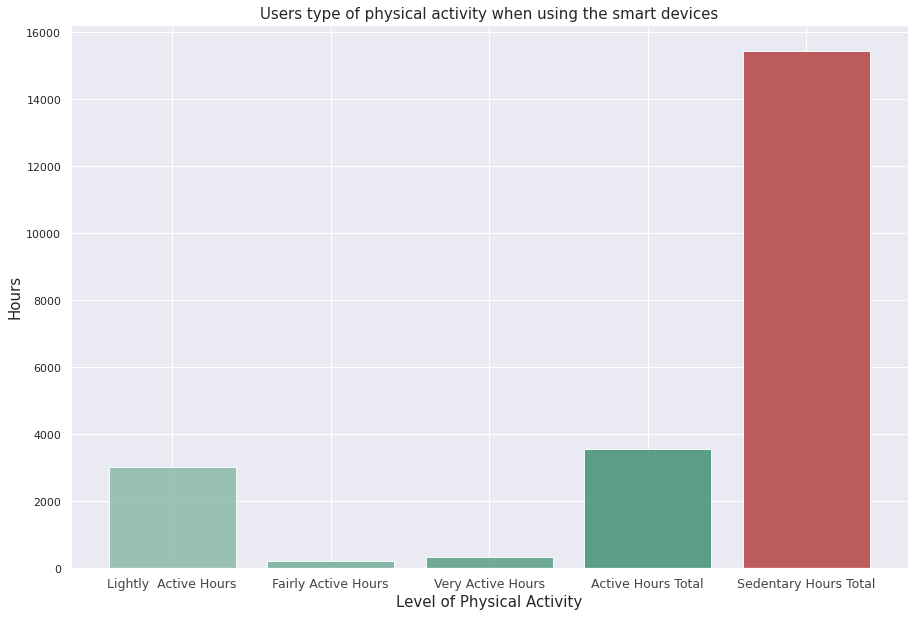

In [121]:
# Create Dataset
height = [light_act_h, fairly_act_h, very_act_h, act_h_tot, sed_h_tot]
bars = ('Lightly  Active Hours', 'Fairly Active Hours', 'Very Active Hours', 'Active Hours Total', 'Sedentary Hours Total')
x_pos = np.arange(len(bars))

plt.figure(figsize=(15,10))
# Create bars and choose color
plt.bar(x_pos, height, color=('#8fbdad', '#79b09d', '#62a38c', '#4c967c', '#b74c4c'), alpha=0.9)

# Add title and axis names
plt.title('Users type of physical activity when using the smart devices', fontsize=15)
plt.xlabel('Level of Physical Activity', fontsize=15)
plt.ylabel('Hours', fontsize=15)

# Create names on the x axis
plt.xticks(x_pos, bars, fontsize=12.5, color='#444444')
 
# Show graph
plt.show()

## **Visualization**
  * Steps taken and calories burned (on average), per weekday

In [122]:
subset_0.head()

,Id,Day,VeryActiveMinutes,VeryActiveHours,FairlyActiveMinutes,FairlyActiveHours,LightlyActiveMinutes,LightlyActiveHours,ActiveHoursTotal,SedentaryHoursTotal,SedentaryMinutes,Calories,TotalSteps
0,1503960366,Tuesday,25,0.416667,13,0.216667,328,5.466667,6.100000,12.133333,728,1985,13162
1,1503960366,Wednesday,21,0.350000,19,0.316667,217,3.616667,4.283333,12.933333,776,1797,10735
2,1503960366,Thursday,30,0.500000,11,0.183333,181,3.016667,3.700000,20.300000,1218,1776,10460
3,1503960366,Friday,29,0.483333,34,0.566667,209,3.483333,4.533333,12.100000,726,1745,9762
4,1503960366,Saturday,36,0.600000,10,0.166667,221,3.683333,4.450000,12.883333,773,1863,12669


In [123]:
# Prepare the variable for the vsualization

mon_steps = int(subset_0['TotalSteps'].where(subset_0['Day'] == 'Monday').dropna().mean())
mon_cal = int(subset_0['Calories'].where(subset_0['Day'] == 'Monday').dropna().mean())

tue_steps = int(subset_0['TotalSteps'].where(subset_0['Day'] == 'Tuesday').dropna().mean())
tue_cal = int(subset_0['Calories'].where(subset_0['Day'] == 'Tuesday').dropna().mean())

wed_steps = int(subset_0['TotalSteps'].where(subset_0['Day'] == 'Wednesday').dropna().mean())
wed_cal = int(subset_0['Calories'].where(subset_0['Day'] == 'Wednesday').dropna().mean())

thu_steps = int(subset_0['TotalSteps'].where(subset_0['Day'] == 'Thursday').dropna().mean())
thu_cal = int(subset_0['Calories'].where(subset_0['Day'] == 'Thursday').dropna().mean())

fri_steps = int(subset_0['TotalSteps'].where(subset_0['Day'] == 'Friday').dropna().mean())
fri_cal = int(subset_0['Calories'].where(subset_0['Day'] == 'Friday').dropna().mean())

sat_steps = int(subset_0['TotalSteps'].where(subset_0['Day'] == 'Saturday').dropna().mean())
sat_cal = int(subset_0['Calories'].where(subset_0['Day'] == 'Saturday').dropna().mean())

sun_steps = int(subset_0['TotalSteps'].where(subset_0['Day'] == 'Sunday').dropna().mean())
sun_cal = int(subset_0['Calories'].where(subset_0['Day'] == 'Sunday').dropna().mean())

print('Cals: ', mon_cal, tue_cal, wed_cal, wed_cal, thu_cal, fri_cal, sat_cal, sun_cal)
print('Steps: ', mon_steps, tue_steps, wed_steps, wed_steps, thu_steps, fri_steps, sat_steps, sun_steps)

Cals:  2324 2356 2302 2302 2202 2338 2354 2263
Steps:  7780 8143 7570 7570 7456 7475 8152 6933


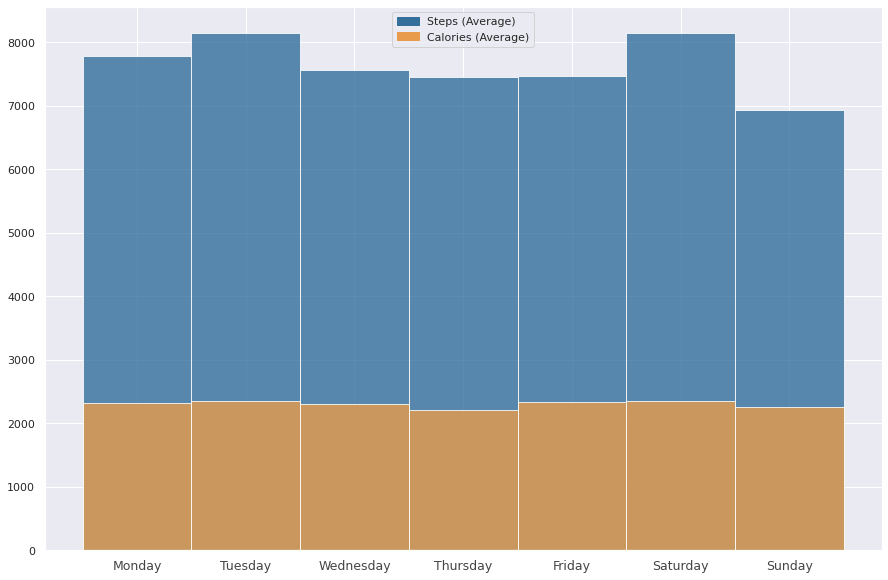

In [124]:
# Values for each bar
bar1 = [mon_steps, tue_steps, wed_steps, thu_steps, fri_steps, sat_steps, sun_steps]
bar2 = [mon_cal, tue_cal, wed_cal, thu_cal, fri_cal, sat_cal, sun_cal]

plt.figure(figsize=(15,10))
# Height of bar1 + bar2
bars = np.add(bar1, bar2).tolist()
# Position of bars
pos = [0, 1, 2, 3, 4, 5, 6]
# Bar names and width
names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bar_w = 1
# Steps Bars
plt.bar(pos, bar1, color='#346f9c', edgecolor='white', width=bar_w, alpha=0.8)
# Calories Bars
plt.bar(pos, bar2, color='#e89c4b', edgecolor='white', width=bar_w, alpha=0.8)
# Custom X Axis
plt.xticks(pos, names, fontsize=12.5, color='#444444')
# Color legend
colors = {'Steps (Average)':'#346f9c', 'Calories (Average)':'#e89c4b'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.show()

## **Visualization**
  * Some prints on average distance, hours of activity, sedentary hours and calories spent per weekday.
  * How users spend their day (activity wise)

In [125]:
subset_1 = daily_activity_df.drop(columns=['TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance',
                                          'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes'])
# Reorder column order
subset_1 = subset_1[['Id', 'ActivityDate', 'Day', 'TotalSteps', 'TotalDistance', 'ActiveMinutesTotal', 'ActiveHoursTotal',
                     'SedentaryMinutes','SedentaryHoursTotal', 'Calories']]
subset_1                   

,Id,ActivityDate,Day,TotalSteps,TotalDistance,ActiveMinutesTotal,ActiveHoursTotal,SedentaryMinutes,SedentaryHoursTotal,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.500000,366,6.100000,728,12.133333,1985
1,1503960366,2016-04-13,Wednesday,10735,6.970000,257,4.283333,776,12.933333,1797
2,1503960366,2016-04-14,Thursday,10460,6.740000,222,3.700000,1218,20.300000,1776
3,1503960366,2016-04-15,Friday,9762,6.280000,272,4.533333,726,12.100000,1745
4,1503960366,2016-04-16,Saturday,12669,8.160000,267,4.450000,773,12.883333,1863
...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,Sunday,10686,8.110000,266,4.433333,1174,19.566667,2847
936,8877689391,2016-05-09,Monday,20226,18.250000,309,5.150000,1131,18.850000,3710
937,8877689391,2016-05-10,Tuesday,10733,8.150000,253,4.216667,1187,19.783333,2832
938,8877689391,2016-05-11,Wednesday,21420,19.559999,313,5.216667,1127,18.783333,3832


In [126]:
mon_subset_1 = subset_1.where(subset_1['Day'] == 'Monday').dropna()
mon_avg_dist = "{:.2f}".format(mon_subset_1['TotalDistance'].sum() / len(mon_subset_1))
mon_avg_hours = "{:.2f}".format(mon_subset_1['ActiveHoursTotal'].sum() / len(mon_subset_1))
mon_avg_cal = mon_subset_1['Calories'].sum() / len(mon_subset_1)
mon_avg_sed = "{:.2f}".format(mon_subset_1['SedentaryHoursTotal'].sum() / len(mon_subset_1))

tue_subset_1 = subset_1.where(subset_1['Day'] == 'Tuesday').dropna()
tue_avg_dist = "{:.2f}".format(tue_subset_1['TotalDistance'].sum() / len(tue_subset_1))
tue_avg_hours = "{:.2f}".format(tue_subset_1['ActiveHoursTotal'].sum() / len(tue_subset_1))
tue_avg_cal = tue_subset_1['Calories'].sum() / len(tue_subset_1)
tue_avg_sed = "{:.2f}".format(tue_subset_1['SedentaryHoursTotal'].sum() / len(tue_subset_1))


wed_subset_1 = subset_1.where(subset_1['Day'] == 'Wednesday').dropna()
wed_avg_dist = "{:.2f}".format(wed_subset_1['TotalDistance'].sum() / len(wed_subset_1))
wed_avg_hours = "{:.2f}".format(wed_subset_1['ActiveHoursTotal'].sum() / len(wed_subset_1))
wed_avg_cal = wed_subset_1['Calories'].sum() / len(wed_subset_1)
wed_avg_sed = "{:.2f}".format(wed_subset_1['SedentaryHoursTotal'].sum() / len(wed_subset_1))

thu_subset_1 = subset_1.where(subset_1['Day'] == 'Thursday').dropna()
thu_avg_dist = "{:.2f}".format(thu_subset_1['TotalDistance'].sum() / len(thu_subset_1))
thu_avg_hours = "{:.2f}".format(thu_subset_1['ActiveHoursTotal'].sum() / len(thu_subset_1))
thu_avg_cal = thu_subset_1['Calories'].sum() / len(thu_subset_1)
thu_avg_sed = "{:.2f}".format(thu_subset_1['SedentaryHoursTotal'].sum() / len(thu_subset_1))


fri_subset_1 = subset_1.where(subset_1['Day'] == 'Friday').dropna()
fri_avg_dist = "{:.2f}".format(fri_subset_1['TotalDistance'].sum() / len(fri_subset_1))
fri_avg_hours = "{:.2f}".format(fri_subset_1['ActiveHoursTotal'].sum() / len(fri_subset_1))
fri_avg_cal = fri_subset_1['Calories'].sum() / len(fri_subset_1)
fri_avg_sed = "{:.2f}".format(fri_subset_1['SedentaryHoursTotal'].sum() / len(fri_subset_1))


sat_subset_1 = subset_1.where(subset_1['Day'] == 'Saturday').dropna()
sat_avg_dist = "{:.2f}".format(sat_subset_1['TotalDistance'].sum() / len(sat_subset_1))
sat_avg_hours = "{:.2f}".format(sat_subset_1['ActiveHoursTotal'].sum() / len(sat_subset_1))
sat_avg_cal = sat_subset_1['Calories'].sum() / len(sat_subset_1)
sat_avg_sed = "{:.2f}".format(sat_subset_1['SedentaryHoursTotal'].sum() / len(sat_subset_1))


sun_subset_1 = subset_1.where(subset_1['Day'] == 'Sunday').dropna()
sun_avg_dist = "{:.2f}".format(sun_subset_1['TotalDistance'].sum() / len(sun_subset_1))
sun_avg_hours = "{:.2f}".format(sun_subset_1['ActiveHoursTotal'].sum() / len(sun_subset_1))
sun_avg_cal = sun_subset_1['Calories'].sum() / len(sun_subset_1)
sun_avg_sed = "{:.2f}".format(sun_subset_1['SedentaryHoursTotal'].sum() / len(sun_subset_1))


print('Mondays:\n \tAverage Distance: ', mon_avg_dist, '\tAverage Hours of Activity: ', mon_avg_hours, '\tAverage Sedentary Hours: ',mon_avg_sed ,'\tAverage Calories: ', mon_avg_cal, '\n',
      'Tuesdays:\n \tAverage Distance: ', tue_avg_dist, '\tAverage Hours of Activity: ', tue_avg_hours, '\tAverage Sedentary Hours: ', tue_avg_sed , '\tAverage Calories: ', tue_avg_cal, '\n',
      'Wednesdays:\n \tAverage Distance: ', wed_avg_dist, '\tAverage Hours of Activity: ', wed_avg_hours, '\tAverage Sedentary Hours: ', wed_avg_sed , '\tAverage Calories: ', wed_avg_cal, '\n',
      'Thursdays:\n \tAverage Distance: ', thu_avg_dist, '\tAverage Hours of Activity: ', thu_avg_hours, '\tAverage Sedentary Hours: ', thu_avg_sed , '\tAverage Calories: ', thu_avg_cal, '\n',
      'Fridays:\n \tAverage Distance: ', fri_avg_dist, '\tAverage Hours of Activity: ', fri_avg_hours, '\tAverage Sedentary Hours: ', fri_avg_sed , '\tAverage Calories: ', fri_avg_cal, '\n',
      'Saturdays:\n \tAverage Distance: ', sat_avg_dist, '\tAverage Hours of Activity: ', sat_avg_hours, '\tAverage Sedentary Hours: ', sat_avg_sed , '\tAverage Calories: ', sat_avg_cal, '\n',
      'Sundays:\n \tAverage Distance: ', sun_avg_dist, '\tAverage Hours of Activity: ', sun_avg_hours, '\tAverage Sedentary Hours: ', sun_avg_sed , '\tAverage Calories: ', sun_avg_cal, '\n',)

Mondays:
 	Average Distance:  5.55 	Average Hours of Activity:  3.82 	Average Sedentary Hours:  17.13 	Average Calories:  2324.2083333333335 
 Tuesdays:
 	Average Distance:  5.84 	Average Hours of Activity:  3.92 	Average Sedentary Hours:  16.76 	Average Calories:  2356.476821192053 
 Wednesdays:
 	Average Distance:  5.50 	Average Hours of Activity:  3.74 	Average Sedentary Hours:  16.46 	Average Calories:  2302.5973154362414 
 Thursdays:
 	Average Distance:  5.35 	Average Hours of Activity:  3.64 	Average Sedentary Hours:  15.98 	Average Calories:  2202.472602739726 
 Fridays:
 	Average Distance:  5.33 	Average Hours of Activity:  3.96 	Average Sedentary Hours:  16.69 	Average Calories:  2338.224 
 Saturdays:
 	Average Distance:  5.85 	Average Hours of Activity:  4.07 	Average Sedentary Hours:  16.07 	Average Calories:  2354.967741935484 
 Sundays:
 	Average Distance:  5.03 	Average Hours of Activity:  3.47 	Average Sedentary Hours:  16.50 	Average Calories:  2263.0 



In [127]:
# I will get the average sleep time calculated above for each week day
cols = {'avg_sleep': [mon_sleep, tue_sleep, wed_sleep, thu_sleep, fri_sleep, sat_sleep, sun_sleep],
        'avg_hours_act': [mon_avg_hours, tue_avg_hours, wed_avg_hours, thu_avg_hours, fri_avg_hours, sat_avg_hours, sun_avg_hours],
        'avg_hours_sed': [mon_avg_sed, tue_avg_sed, wed_avg_sed, thu_avg_sed, fri_avg_sed, sat_avg_sed, sun_avg_sed]}

avg_df = pd.DataFrame(data=cols, index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
avg_df

,avg_sleep,avg_hours_act,avg_hours_sed
Monday,6,3.82,17.13
Tuesday,6,3.92,16.76
Wednesday,7,3.74,16.46
Thursday,6,3.64,15.98
Friday,6,3.96,16.69
Saturday,7,4.07,16.07
Sunday,7,3.47,16.50


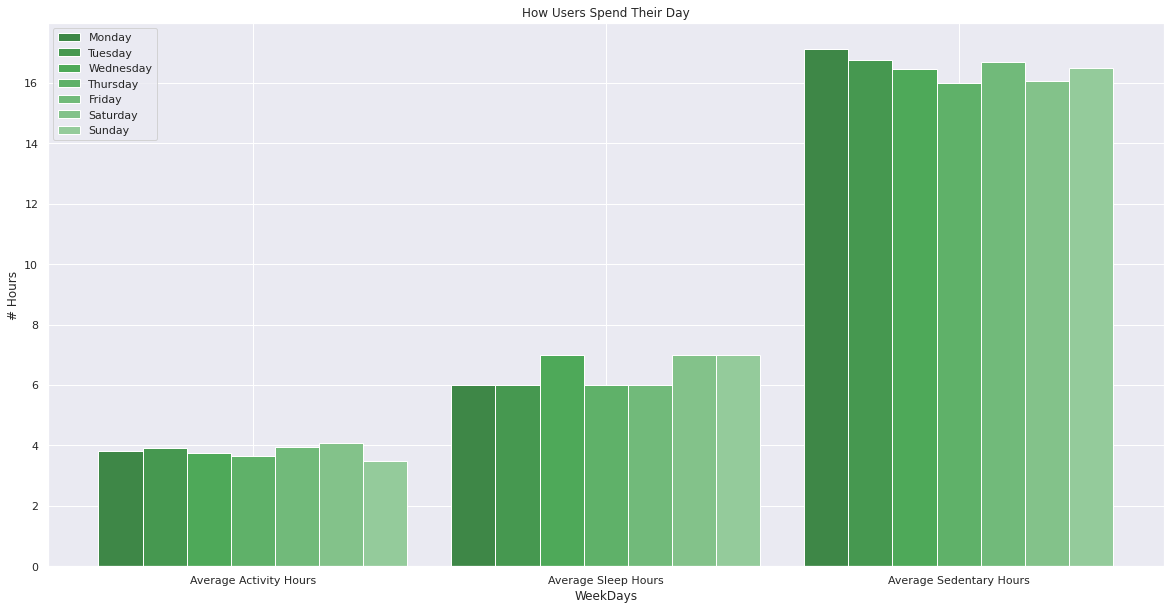

In [128]:
N = 3
ind = np.arange(N) 
width = 0.125
  

plt.figure(figsize=(20,10))  
mon_vals = [3.82, 6, 17.13]
bar_mon = plt.bar(ind, mon_vals, width, color = '#3e8747')

tue_vals = [3.92, 6, 16.76]
bar_tue = plt.bar(ind+width, tue_vals, width, color = '#469850')

wed_vals = [3.74, 7, 16.46]
bar_wed = plt.bar(ind+width*2, wed_vals, width, color = '#4ea959')

thu_vals = [3.64, 6, 15.98]
bar_thu = plt.bar(ind+width*3, thu_vals, width, color = '#5fb169')

fri_vals = [3.96, 6, 16.69]
bar_fri = plt.bar(ind+width*4, fri_vals, width, color = '#71ba7a')

sat_vals = [4.07, 7, 16.07]
bar_sat = plt.bar(ind+width*5, sat_vals, width, color = '#83c28a')

sun_vals = [3.47, 7, 16.50]
bar_sun = plt.bar(ind+width*6, sun_vals, width, color = '#94cb9b')

plt.xlabel("WeekDays")
plt.ylabel('# Hours')
plt.title("How Users Spend Their Day")
  
plt.xticks(ind+width*3,['Average Activity Hours', 'Average Sleep Hours', 'Average Sedentary Hours'])
plt.legend( (bar_mon, bar_tue, bar_wed, bar_thu, bar_fri, bar_sat, bar_sun), ('Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday') )
plt.show()

# **6. Act**


### **Final Conclusions**

* Users burn more calories (on average) between **17:00 to 19:00** (included) hours of the day, followed by the **12:00 to 14:00** (included) hours.
* When using the smart devices:  
  * A total of **18.72%** of the time is spent on some sort of phycical activity:   
    * **Very** active physical activity: **9.31%**
    * **Fairly** active physical activity: **5.96%**
    * **Light** active physical activity: **84.71%**
  * A total of **81.28%** of the time is spent on inactivity.
* On average:
  * Users spend more calories on **Tuesdays**, **Fridays** and **Saturdays**.
  * Users walk more (number of steps) on **Mondays**, **Tuesdays** and **Saturdays**.
  * Users sleep more on **Wednesdays** and **the weekend** (+1hour).

### **Recommendations**

* Bellabeat marketing team can educate their customers on fitness benefits, different exercise types, calories intake and burnt rate as well as some ideal capstones for a daily exercise. 
* Encourage users to exercise more on weekends, prompting notifications on the apps with sugestions. 
* Both companies develop products focused on womens health, helping them to understand their day-to-day habits and make healthy decisions. These trends can for sure be applied to Bellabeat customers.